# Notebook Ilustrating a Benchmark HH Neuron to be used with Model Fitting

In [1]:
from brian2 import *
from brian2tools import *

import matplotlib.pyplot as plt
%matplotlib inline

## HH Example

In [2]:
area = 20000*umetre**2

In [3]:
# Generate a step-current input and an "experimental" voltage trace
dt = 0.01*ms
input_current = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA

In [4]:
N, n1 = np.array([input_current]).shape

In [5]:

params = {'gl': float(5e-5*siemens*cm**-2 * area),
          'g_na': float(100*msiemens*cm**-2 * area),
          'g_kd': float(30*msiemens*cm**-2 * area)}
print ('"correct" parameters:', params)

"correct" parameters: {'gl': 1e-08, 'g_na': 2e-05, 'g_kd': 6e-06}


In [6]:
input_current.shape

(1497,)

In [7]:
# Parameters
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
gl = 5e-5*siemens*cm**-2 * area,
g_kd = 30*msiemens*cm**-2 * area,

defaultclock.dt = dt
I = TimedArray(input_current, dt=dt)

In [8]:
# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

G = NeuronGroup(1, eqs, method='exponential_euler')
G.v = El
G.set_states(params, units=False)
mon = StateMonitor(G, 'v', record=0)
run(20*ms)

In [9]:
voltage = mon.v[0]/mV

In [10]:
voltage += np.random.randn(len(voltage))

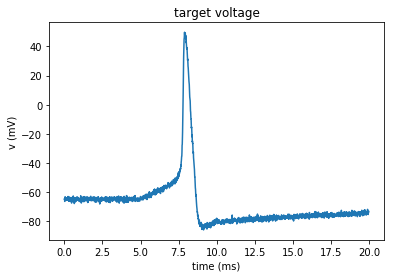

In [11]:
plot(np.arange(len(voltage))*dt/ms, voltage); 
title('target voltage'); xlabel('time (ms)'); ylabel('v (mV)');

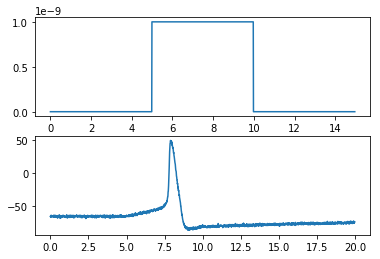

In [12]:
fig, ax = plt.subplots(2,1)
ax[0].plot(np.arange(len(I.values))*dt/ms, I.values);
ax[1].plot(np.arange(len(voltage))*dt/ms, voltage); 

In [13]:
inp_trace = np.array([input_current])
n0, n1 = inp_trace.shape
inp_trace.shape

(1, 1497)

In [14]:
out_trace = np.array([voltage[:n1]])
out_trace.shape

(1, 1497)

## brian2tools version 

In [18]:
# params = {'gl': float(5e-5*siemens*cm**-2 * area),
#           'g_na': float(100*msiemens*cm**-2 * area),
#           'g_kd': float(30*msiemens*cm**-2 * area)}

In [22]:
params, fits, error = fit_traces(model = eqs, input_var = 'I', output_var = 'v',\
        input = inp_trace * nA, output = out_trace*mV, dt = dt,
        gl = [1e-09, 1e-07],
        g_na  = [1e-07, 1e-03],
        g_kd = [1e-08, 1e-04], 
        tol = 1e-6, popsize=10)

input [[0. 0. 0. ... 0. 0. 0.]] A
params: [[9.96258669e-05 8.94125198e-04 1.80964077e-11]
 [6.91370972e-05 6.53809384e-04 3.52121992e-13]
 [5.17237275e-05 6.33282845e-04 1.17278964e-11]
 [7.73409456e-05 4.32166401e-05 3.12878011e-12]
 [5.91265276e-05 1.37943452e-04 1.01102608e-11]
 [8.57967367e-05 1.11077554e-04 1.80012501e-11]
 [1.34041068e-05 5.54349760e-04 1.53215413e-11]
 [5.51646778e-05 3.12069971e-04 1.93727164e-11]
 [2.68970036e-05 2.37292919e-04 1.00123894e-11]
 [3.27201798e-05 8.59817470e-04 7.63918871e-12]
 [6.32055441e-05 4.64123231e-04 1.69573707e-12]
 [7.54681341e-05 5.76874876e-04 1.26663745e-11]
 [7.33191700e-05 8.14947943e-04 5.46712375e-12]
 [8.16965234e-05 1.85216227e-05 5.88572230e-12]
 [3.61734144e-05 7.91629319e-04 1.31065566e-11]
 [1.14693552e-05 3.58480045e-04 1.55052310e-11]
 [7.96895612e-06 5.29522172e-04 8.37633578e-12]
 [2.02542482e-05 2.94174971e-04 1.11557155e-11]
 [5.16504822e-06 7.52223470e-04 1.04762755e-12]
 [2.61381215e-05 3.96475869e-04 2.71804318e-12

BrianObjectException: Original error and traceback:
Traceback (most recent call last):
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 129, in render_node
    return getattr(self, methname)(node)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 190, in render_Call
    for subnode, argtype in zip(node.args, funcvar._arg_types):
AttributeError: 'Subexpression' object has no attribute '_arg_types'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/core/network.py", line 864, in before_run
    obj.before_run(run_namespace)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/groups/group.py", line 1128, in before_run
    codeobj_class=self.codeobj_class
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/codegen/codeobject.py", line 309, in create_runner_codeobj
    _, uk, u = analyse_identifiers(v, all_variables, recursive=True)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/codegen/translation.py", line 94, in analyse_identifiers
    scalar_stmts, vector_stmts = make_statements(code, variables, np.float64, optimise=False)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/utils/caching.py", line 100, in cached_func
    func._cache[cache_key] = func(*args, **kwds)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/codegen/translation.py", line 236, in make_statements
    annotated_ast = brian_ast(expr, variables)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 112, in brian_ast
    return renderer.render_node(node)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 129, in render_node
    return getattr(self, methname)(node)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 209, in render_BinOp
    node.left = self.render_node(node.left)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 129, in render_node
    return getattr(self, methname)(node)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 210, in render_BinOp
    node.right = self.render_node(node.right)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 129, in render_node
    return getattr(self, methname)(node)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 209, in render_BinOp
    node.left = self.render_node(node.left)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/bast.py", line 131, in render_node
    raise SyntaxError("Unknown syntax: " + nodename)
  File "<string>", line None
SyntaxError: Unknown syntax: Call

Error encountered with object named "neurongroup_2_run_regularly_1".
Object was created here (most recent call only, full details in debug log):
  File "/home/alteska/Desktop/brian/brian2tools/brian2tools/modelfitting/modelfitting.py", line 132, in fit_traces
    neurons.run_regularly(state_update_code, when='groups')

An error occurred when preparing an object.   File "<string>", line None

SyntaxError: Unknown syntax: Call
(See above for original error message and traceback.)